In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


In [3]:
gdp_df = gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
###5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(7176, 4)

In [6]:
###6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_renew = gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_renew = gdp_renew.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [9]:
gdp_renew.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [10]:
###7. How many countries have data for all years? Which countries are missing many years of data? 
##Look at the number of observations per year. What do you notice? 

In [11]:
###8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
###Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under 
###the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you 
###look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily 
###get out of the others?

In [12]:
twenty_gdp = gdp_renew.loc[gdp_renew['Year'] == 2020]
twenty_gdp.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539


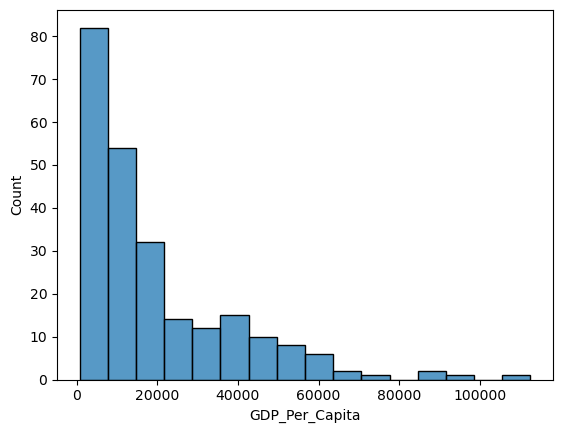

In [13]:
sns.histplot(data=twenty_gdp, x="GDP_Per_Capita")
plt.show()

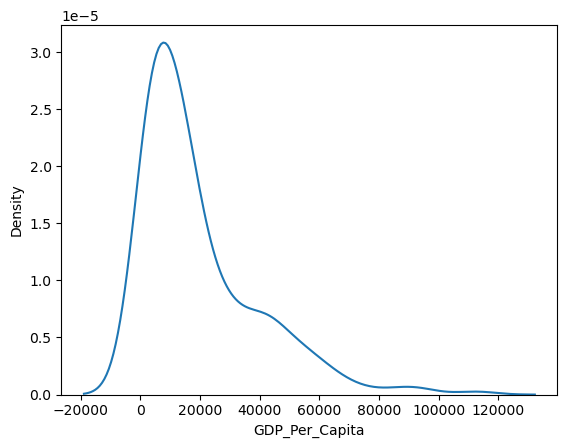

In [14]:
sns.kdeplot(twenty_gdp['GDP_Per_Capita'])
plt.show()

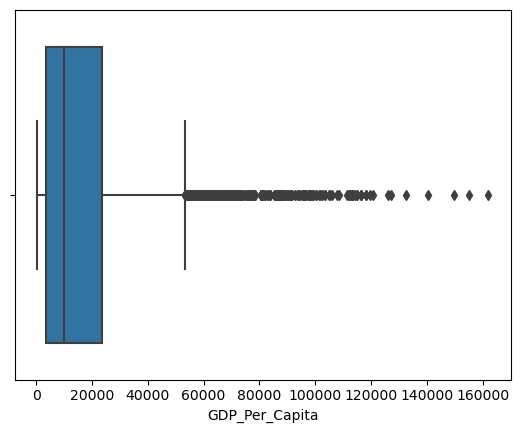

In [15]:
sns.boxplot(x=gdp_renew["GDP_Per_Capita"])
plt.show()

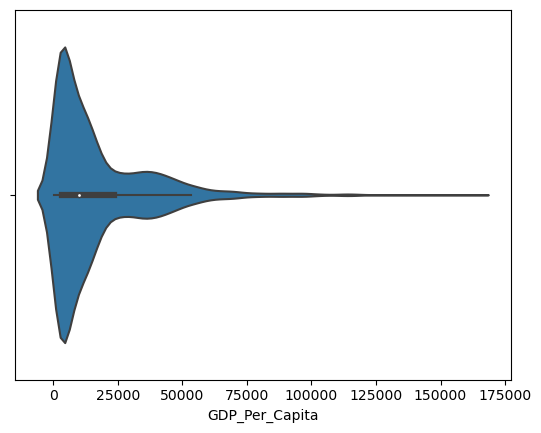

In [16]:
sns.violinplot(x=gdp_renew["GDP_Per_Capita"])
plt.show()

In [17]:
###9. What was the median GDP per capita value in 2020?

In [18]:
twenty_gdp['GDP_Per_Capita'].median()

12908.9374056206

#10. For this question, you're going to create some visualizations to compare GDP per capita values 
#for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to 
#just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	*# boxplot
	* #A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* #A scatterplot
	# A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [19]:
decades_gdp = gdp_renew.loc[(gdp_renew.Year == 1990) | (gdp_renew.Year == 2000)| (gdp_renew.Year == 2010) | (gdp_renew.Year == 2020)]
decades_gdp.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

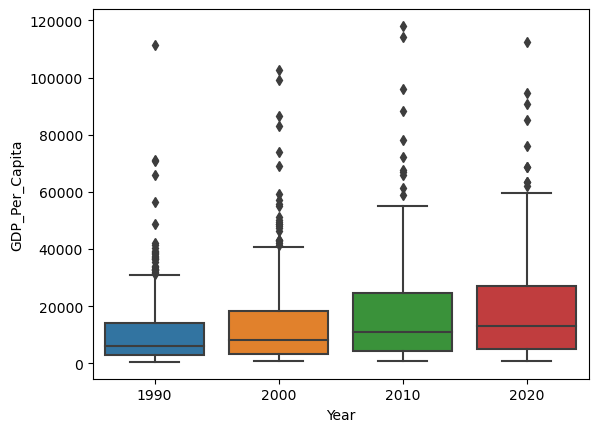

In [20]:
sns.boxplot(x='Year', y= 'GDP_Per_Capita', data = decades_gdp)


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

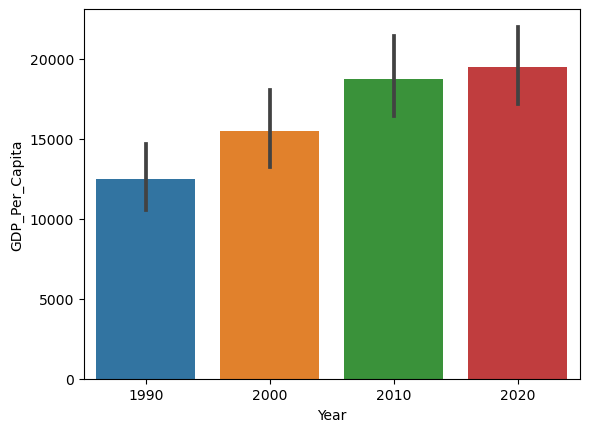

In [21]:
sns.barplot(x='Year', y= 'GDP_Per_Capita', data = decades_gdp)


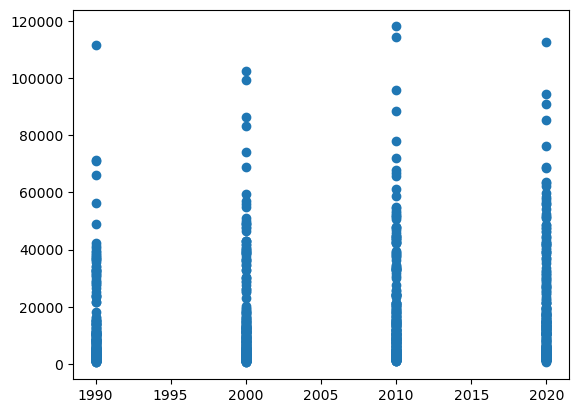

In [22]:
plt.scatter(x='Year', y= 'GDP_Per_Capita', data = decades_gdp)


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

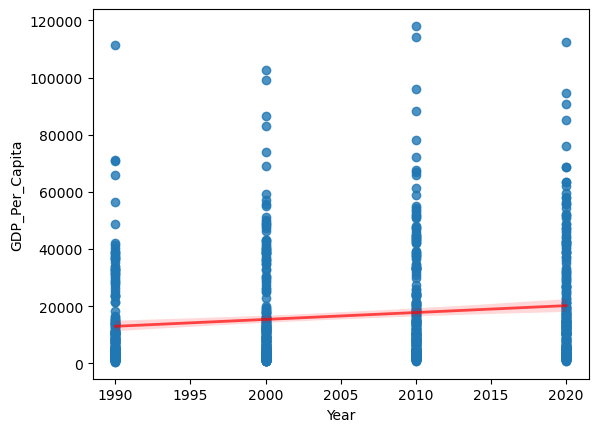

In [23]:
sns.regplot(x='Year', y= 'GDP_Per_Capita', line_kws={"color":"r","alpha":0.7,"lw":2}, data = decades_gdp)

In [24]:
#11. Which country was the first to have a GDP per capita greater than $100,000?


In [25]:
gdp_over_hundred = gdp_renew.query('GDP_Per_Capita > 100000')

In [26]:
gdp_over_hundred.sort_values(by='Year', ascending = True).head()

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
6837,United Arab Emirates,1991,106103.552655
6836,United Arab Emirates,1992,103470.924576
6834,United Arab Emirates,1994,100213.156226
6833,United Arab Emirates,1995,101570.992100


In [27]:
#12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has
#changed over the timespan of the dataset.

In [28]:
gdp_twenty = gdp_renew.loc[(gdp_renew.Year == 2020)]
gdp_twenty.sort_values(by='GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057


In [29]:
luxembourg = gdp_renew.loc[(gdp_renew.Country == 'Luxembourg')]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

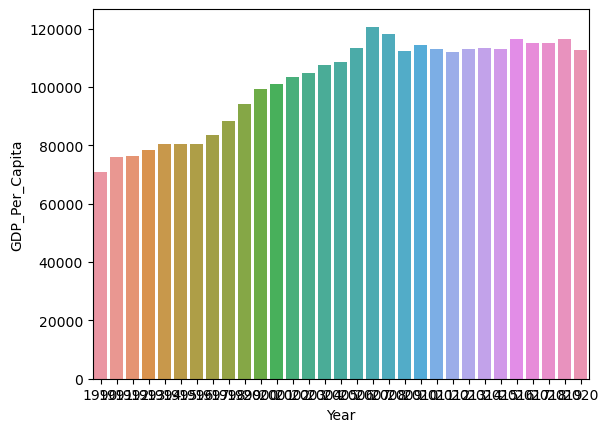

In [30]:
sns.barplot(x='Year', y= 'GDP_Per_Capita', data = luxembourg)

In [31]:
#14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
#Check the arguments for the read_csv function to find ones that can help correct the errors 
#(https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look 
#at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [34]:
#15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [35]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [36]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [37]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [38]:
#16. Look at the number of observations in this dataset per year. What do you notice?

In [39]:
#17. What is the first year to have a non-zero internet users percentage value?

In [40]:
internet_above = internet_df.query('Internet_Users_Pct > 0.0')

In [41]:
internet_above.sort_values(by='Year').head()

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729


In [42]:
#18. How does the distribution of internet users percent differ for 2000 and 2014?

In [43]:
internet_comp = internet_df.loc[(internet_df.Year == 2000)|(internet_df.Year == 2014)]

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

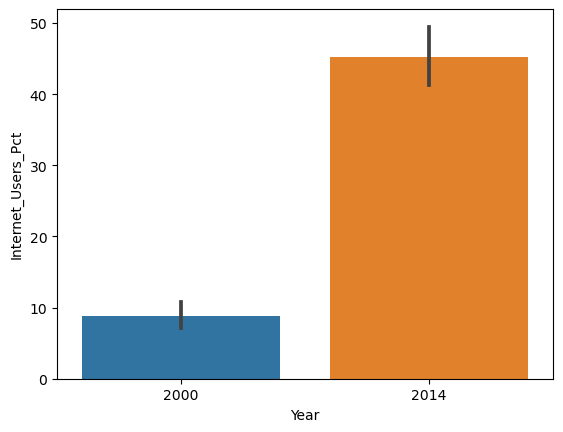

In [44]:
sns.barplot(x= 'Year', y= 'Internet_Users_Pct', data= internet_comp)

In [45]:
#19. For how many countries was the percentage of internet users below 5% in 2014?

In [67]:
below_five = internet_df.loc[(internet_df.Year == 2014) & (internet_df.Internet_Users_Pct < 5.0)]
below_five.shape

(16, 3)

In [47]:
#20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new 
#DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [48]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [49]:
gdp_and_internet_use = pd.concat([gdp_df, internet_df])
gdp_and_internet_use

,Country or Area,Year,Value,Value Footnotes,Country,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN,NaN,NaN
1,Afghanistan,2019,2065.036235,NaN,NaN,NaN
2,Afghanistan,2018,2033.804389,NaN,NaN,NaN
3,Afghanistan,2017,2058.400221,NaN,NaN,NaN
4,Afghanistan,2016,2057.067978,NaN,NaN,NaN
...,...,...,...,...,...,...
4490,NaN,1997,NaN,NaN,Zimbabwe,0.033080
4491,NaN,1996,NaN,NaN,Zimbabwe,0.016790
4492,NaN,1995,NaN,NaN,Zimbabwe,0.007684
4493,NaN,1994,NaN,NaN,Zimbabwe,0.001739


In [50]:
#21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid 
#(https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for
#these three countries. What do you notice?


In [51]:
gdp_renew = gdp_df.drop(columns = ['Value Footnotes'])

In [52]:
gdp_renew = gdp_renew.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [53]:
fourteen = gdp_renew.loc[gdp_renew['Year'] == 2014]

In [54]:
fourteen.sort_values(by = 'GDP_Per_Capita', ascending = False).head(3)

,Country,Year,GDP_Per_Capita
3919,"Macao SAR, China",2014,155201.740571
3888,Luxembourg,2014,113313.578898
5387,Qatar,2014,95578.261511


In [55]:
top_three = gdp_renew.loc[(gdp_renew.Country == 'Macao SAR, China') | (gdp_renew.Country == 'Luxembourg') | (gdp_renew.Country == 'Qatar')]

C:\Users\liamp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


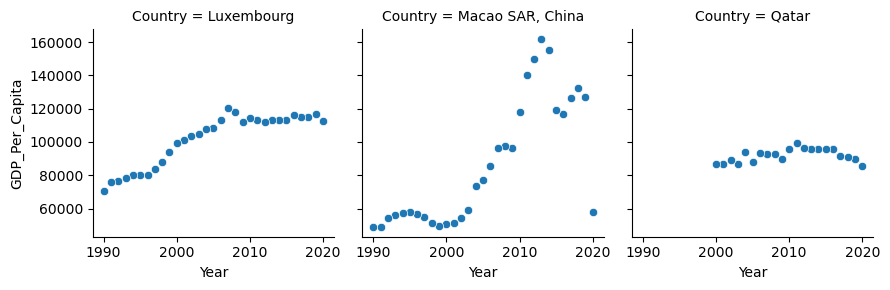

In [57]:
g = sns.FacetGrid(top_three, col="Country")
g.map(sns.scatterplot, "Year", "GDP_Per_Capita")

In [ ]:
#22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [59]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]

In [ ]:
#23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice 
#from this plot? If you see any unusual points, investigate them.